## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import re
import string
from collections import Counter
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('negative_new_test.csv', encoding='utf-8')
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1485663625893212169,1485627425987956736,2022-01-24 22:49:45 Sri Lanka Standard Time,2022-01-24,22:49:45,530,1267256084848349185,frutitaverde,ᴀɴ'ප,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'sp1cysung', 'name': 'nanaଘ(੭...",NaN,NaN,NaN,NaN
1,1,1485659641442979844,1485659641442979840,2022-01-24 22:33:55 Sri Lanka Standard Time,2022-01-24,22:33:55,530,1280971809794506753,_krii1,ප𖡼.𖤣ප්𖥧,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1485655832100540423,1485655832100540416,2022-01-24 22:18:47 Sri Lanka Standard Time,2022-01-24,22:18:47,530,1280971809794506753,_krii1,ප𖡼.𖤣ප්𖥧,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1485650893261443072,1485650893261443072,2022-01-24 21:59:09 Sri Lanka Standard Time,2022-01-24,21:59:09,530,1280971809794506753,_krii1,ප𖡼.𖤣ප්𖥧,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1485650623643193356,1485650623643193344,2022-01-24 21:58:05 Sri Lanka Standard Time,2022-01-24,21:58:05,530,1280971809794506753,_krii1,ප𖡼.𖤣ප්𖥧,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8729 entries, 0 to 8728
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8729 non-null   int64  
 1   id               8729 non-null   int64  
 2   conversation_id  8729 non-null   int64  
 3   created_at       8729 non-null   object 
 4   date             8729 non-null   object 
 5   time             8729 non-null   object 
 6   timezone         8729 non-null   int64  
 7   user_id          8729 non-null   int64  
 8   username         8729 non-null   object 
 9   name             8728 non-null   object 
 10  place            2 non-null      object 
 11  tweet            8729 non-null   object 
 12  language         8729 non-null   object 
 13  mentions         8729 non-null   object 
 14  urls             8729 non-null   object 
 15  photos           8729 non-null   object 
 16  replies_count    8729 non-null   int64  
 17  retweets_count

In [4]:
# Get tweet from dataframe
df = df[['tweet']]
df.head()

,tweet
0,@sp1cysung Gracias :( ten lindo días &lt;3
1,altas ganas de ir a florencia la vdd
2,altas ganas de ir al museo ese del que esta ha...
3,como quisiera estar desayunando pizza en Itali...
4,"sxdfgth, ni idea de quien sea, pero me comenta..."


## Preprocessing the dataset

In [5]:
# Removes duplicate and returns a copy of dataframe 
df = df.drop_duplicates()

In [6]:
# Drop Empty Rows and reset index
df = df.dropna()
df = df.reset_index()
df = df.drop('index',axis=1)

In [7]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

df.head()

,tweet
0,@sp1cysung Gracias :( ten lindo días &lt;3
1,altas ganas de ir a florencia la vdd
2,altas ganas de ir al museo ese del que esta ha...
3,como quisiera estar desayunando pizza en Itali...
4,"sxdfgth, ni idea de quien sea, pero me comenta..."


In [8]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,tweet,clean_tweet
0,@sp1cysung Gracias :( ten lindo días &lt;3,Gracias :( ten lindo días &lt;3
1,altas ganas de ir a florencia la vdd,altas ganas de ir a florencia la vdd
2,altas ganas de ir al museo ese del que esta ha...,altas ganas de ir al museo ese del que esta ha...
3,como quisiera estar desayunando pizza en Itali...,como quisiera estar desayunando pizza en Itali...
4,"sxdfgth, ni idea de quien sea, pero me comenta...","sxdfgth, ni idea de quien sea, pero me comenta..."


In [9]:
# remove eng characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[!^a-zA-Z0-9#]", "")
df.head()

,tweet,clean_tweet
0,@sp1cysung Gracias :( ten lindo días &lt;3,:( í &;
1,altas ganas de ir a florencia la vdd,
2,altas ganas de ir al museo ese del que esta ha...,
3,como quisiera estar desayunando pizza en Itali...,", 💔"
4,"sxdfgth, ni idea de quien sea, pero me comenta...",", , , , ://./"


In [10]:
# remove special characters
df['clean_tweet']=df['clean_tweet'].str.replace(":|/|&|$|!|,|í|:|;","")
df.head()

,tweet,clean_tweet
0,@sp1cysung Gracias :( ten lindo días &lt;3,(
1,altas ganas de ir a florencia la vdd,
2,altas ganas de ir al museo ese del que esta ha...,
3,como quisiera estar desayunando pizza en Itali...,💔
4,"sxdfgth, ni idea de quien sea, pero me comenta...",.


In [11]:
# remove brackets
for i in range(len(df)):
    df['clean_tweet'][i] = re.sub(r"[\([{})\]]", "", df['clean_tweet'][i])
df.head()

,tweet,clean_tweet
0,@sp1cysung Gracias :( ten lindo días &lt;3,
1,altas ganas de ir a florencia la vdd,
2,altas ganas de ir al museo ese del que esta ha...,
3,como quisiera estar desayunando pizza en Itali...,💔
4,"sxdfgth, ni idea de quien sea, pero me comenta...",.


In [12]:
# remove dots
dot_pattern = re.compile(r'\.{1,}')
for i in range(len(df)):
    df['clean_tweet'][i] = dot_pattern.sub(' ', df['clean_tweet'][i])
df.head()

,tweet,clean_tweet
0,@sp1cysung Gracias :( ten lindo días &lt;3,
1,altas ganas de ir a florencia la vdd,
2,altas ganas de ir al museo ese del que esta ha...,
3,como quisiera estar desayunando pizza en Itali...,💔
4,"sxdfgth, ni idea de quien sea, pero me comenta...",


In [13]:
# remove extra spaces
df['clean_tweet'] = df['clean_tweet'].str.strip()
df['clean_tweet']=df['clean_tweet'].str.replace("  ","")
df.head()

,tweet,clean_tweet
0,@sp1cysung Gracias :( ten lindo días &lt;3,
1,altas ganas de ir a florencia la vdd,
2,altas ganas de ir al museo ese del que esta ha...,
3,como quisiera estar desayunando pizza en Itali...,💔
4,"sxdfgth, ni idea de quien sea, pero me comenta...",


In [14]:
# Remove All Emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
for i in range(len(df)):
    df['clean_tweet'][i] = emoji_pattern.sub(r'', df['clean_tweet'][i])

df.head()

,tweet,clean_tweet
0,@sp1cysung Gracias :( ten lindo días &lt;3,
1,altas ganas de ir a florencia la vdd,
2,altas ganas de ir al museo ese del que esta ha...,
3,como quisiera estar desayunando pizza en Itali...,
4,"sxdfgth, ni idea de quien sea, pero me comenta...",


In [15]:
# Count clean_tweet word count
def count_length():
    df['word_count'] = df['clean_tweet'].apply(lambda x: len(str(x).split(" ")))
    
count_length()
df.head()

,tweet,clean_tweet,word_count
0,@sp1cysung Gracias :( ten lindo días &lt;3,,1
1,altas ganas de ir a florencia la vdd,,1
2,altas ganas de ir al museo ese del que esta ha...,,1
3,como quisiera estar desayunando pizza en Itali...,,1
4,"sxdfgth, ni idea de quien sea, pero me comenta...",,1


In [16]:
# Remove short words rows
df = df.drop(df[df.word_count < 5].index)
df = df.reset_index(drop=True)
df.head()

,tweet,clean_tweet,word_count
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,කොටි වැළලූ රන් සොයන්න ගිය පී සී ඇතුළු හතක් මාට්ටු,10
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වනහි ප්‍රචාරණ ව්‍...,35
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,අඩෝ උඹේ ගේ පිටිපස්සෙ කොටි ගැහුවද,7
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා,8
4,@SuuTikka එහෙමලු. කූඹි කාලා කොටි මැරුණා කියනවල...,එහෙමලුකූඹි කාලා කොටි මැරුණා කියනවලුනෙ,6


In [17]:
# Sinhala Tokenizer
from sinling import SinhalaTokenizer

tokenizer = SinhalaTokenizer()

def tokenization(sinhala_string):
    tokens = []
    for t in tokenizer.tokenize(sinhala_string):
        tokens.append(t)
    return tokens

tokenized_tweet = df['clean_tweet'].apply(lambda x: tokenization(x))
tokenized_tweet.head()

0    [කොටි, වැළලූ, රන්, සොයන්න, ගිය, පී, සී, ඇතුළු,...
1    [සුඛෝපභෝගී, විලාසිතා, සන්නාමයක්, වනහි, ප්‍රචාර...
2              [අඩෝ, උඹේ, ගේ, පිටිපස්සෙ, කොටි, ගැහුවද]
3    [ලොක්කාගේ, බැංකු, ගිණුමේ, කොටි, පහකට, මෝඩ, යකා...
4          [එහෙමලුකූඹි, කාලා, කොටි, මැරුණා, කියනවලුනෙ]
Name: clean_tweet, dtype: object

In [18]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,tweet,clean_tweet,word_count
0,කොටි වැළලූ රන් සොයන්න ගිය පී.සී ඇතුළු හතක් මාට...,කොටි වැළලූ රන් සොයන්න ගිය පී සී ඇතුළු හතක් මාට්ටු,10
1,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වන Gucci හි ප්‍රච...,සුඛෝපභෝගී විලාසිතා සන්නාමයක් වනහි ප්‍රචාරණ ව්‍...,35
2,@7777sevenfours @Athapaththu184 අඩෝ උඹේ ගේ පිට...,අඩෝ උඹේ ගේ පිටිපස්සෙ කොටි ගැහුවද,7
3,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා ...,ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා,8
4,@SuuTikka එහෙමලු. කූඹි කාලා කොටි මැරුණා කියනවල...,එහෙමලුකූඹි කාලා කොටි මැරුණා කියනවලුනෙ,6


In [19]:
df = df['clean_tweet']
df.head()

0    කොටි වැළලූ රන් සොයන්න ගිය පී සී ඇතුළු හතක් මාට්ටු
1    සුඛෝපභෝගී විලාසිතා සන්නාමයක් වනහි ප්‍රචාරණ ව්‍...
2                     අඩෝ උඹේ ගේ පිටිපස්සෙ කොටි ගැහුවද
3        ලොක්කාගේ බැංකු ගිණුමේ කොටි පහකට මෝඩ යකා කෙලලා
4                එහෙමලුකූඹි කාලා කොටි මැරුණා කියනවලුනෙ
Name: clean_tweet, dtype: object

In [20]:
df.to_csv('sinhala_offensive_language(Preprocess).csv')

## Exploratory Data Analysis

In [21]:
!pip install wordcloud

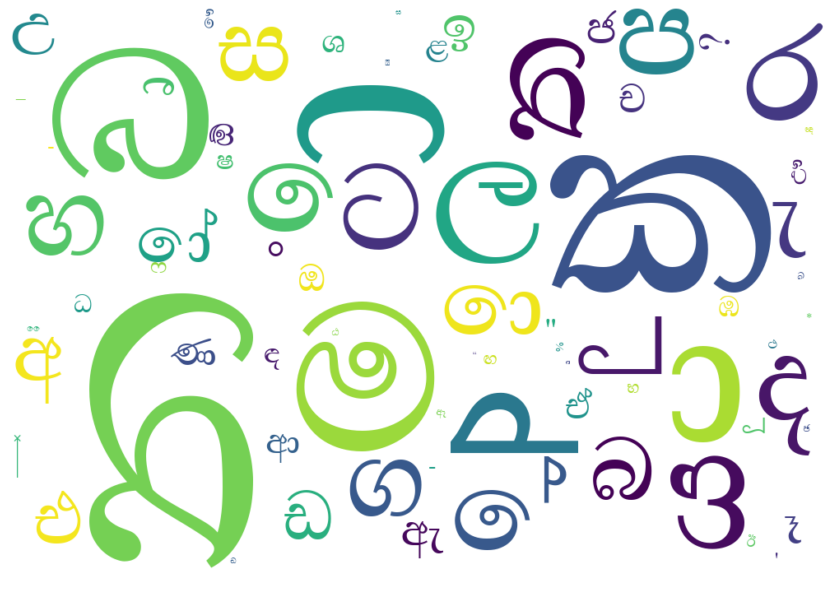

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_list = []
for i in range(len(df)):
    df_list += tokenized_tweet[i]
    
font = "iskpota.ttf"
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()